In [364]:
import pandas as pd
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np
import re
pd.options.display.max_rows = 500

In [525]:
df = pd.read_csv('h03_data.csv', header=0)

### Create classes for unique target sequences

In [9]:
# get set of unique sequences
unique_seqs = set(df['sequence'])

# create dict for classes based on unique sequences
classes = {seq: c for c, seq in enumerate(unique_seqs)}

# assign class to new column in df

for row in range(0,len(df)):
    df.loc[row,'class'] = classes[df.loc[row,'sequence']]

In [389]:
#df.to_csv('h03_data.csv', header=True)

### Generate decision tree

In [56]:
X = df.iloc[:,0:9]

In [57]:
y = df['class']

In [58]:
clf = tree.DecisionTreeClassifier()

one_hot_data = pd.get_dummies(X)

clf = clf.fit(one_hot_data,y)

In [67]:
dot_data = tree.export_graphviz(clf, out_file=None,
                               feature_names=list(one_hot_data.columns),
                               class_names=df['sequence'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('tree')

'tree.pdf'

### Get probabilities for items at each table position

In [333]:
items = ['bottle','bowl','cup','fork','glass','knife','plate','spoon']
columns=['pos1','pos2','pos3','pos4','pos5','pos6','pos7','pos8']

probs_on_table = pd.DataFrame(columns=columns, index=items)

In [334]:
for col in probs_on_table:
    for item in items:
        probs_on_table.loc[item,col] = df[col].value_counts()[item] / len(df[col]) * 100

In [331]:
#probs.to_csv('h03_probabilities_items_positions.csv',header=True,index=True)

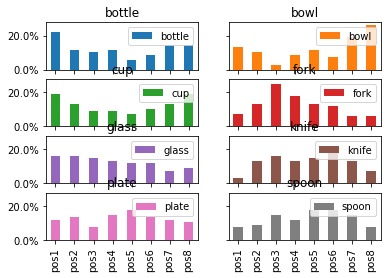

In [335]:
%matplotlib qt

probs_on_table.T.plot.bar(subplots=True, grid=False, legend=False, tick_label=columns,
                layout=(4,2), sharex=True, sharey=True)

[ax.legend(loc=1) for ax in plt.gcf().axes]
plt.gca().yaxis.set_major_formatter(PercentFormatter(100))
plt.show()

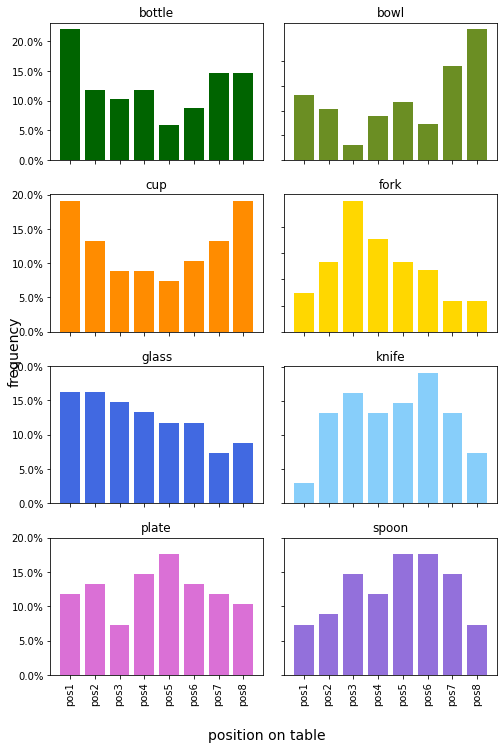

In [336]:
#%matplotlib inline
fig, axs = plt.subplots(4,2)
fig.set_size_inches(8,12)

axs[0,0].bar(np.arange(0,8,1), probs_on_table.T['bottle'], color='darkgreen')
axs[0,1].bar(np.arange(0,8,1), probs_on_table.T['bowl'], color='olivedrab')
axs[1,0].bar(np.arange(0,8,1), probs_on_table.T['cup'], color='darkorange')
axs[1,1].bar(np.arange(0,8,1), probs_on_table.T['fork'], color='gold')
axs[2,0].bar(np.arange(0,8,1), probs_on_table.T['glass'], color='royalblue')
axs[2,1].bar(np.arange(0,8,1), probs_on_table.T['knife'], color='lightskyblue')
axs[3,0].bar(np.arange(0,8,1), probs_on_table.T['plate'], color='orchid')
axs[3,1].bar(np.arange(0,8,1), probs_on_table.T['spoon'], color='mediumpurple')

axs[0,0].set_title('bottle')
axs[0,1].set_title('bowl')
axs[1,0].set_title('cup')
axs[1,1].set_title('fork')
axs[2,0].set_title('glass')
axs[2,1].set_title('knife')
axs[3,0].set_title('plate')
axs[3,1].set_title('spoon')
    
for ax in axs.flat:
    ax.label_outer()
    ax.set_yticks(np.arange(0,25,5))
    ax.set_xticks(range(8))
    ax.set_xticklabels(columns, rotation=90)
    ax.yaxis.set_major_formatter(PercentFormatter(100))

fig.text(0.05, 0.5, 'frequency', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.05, 'position on table', ha='center', fontsize=14)

plt.subplots_adjust(wspace=0.1, hspace=0.25)

plt.show()

### Get frequency for items in sequence position

In [526]:
items = ['bottle','bowl','cup','fork','glass','knife','plate','spoon']
columns_seq = ['seq1','seq2','seq3','seq4','seq5','seq6','seq7','seq8']

probs_in_seq = pd.DataFrame(columns=columns_seq, index=items)

In [528]:
for col in probs_in_seq:
    for item in items:
        try:
            probs_in_seq.loc[item,col] = df[col].value_counts()[item] / len(df[col]) * 100
        except:
            continue

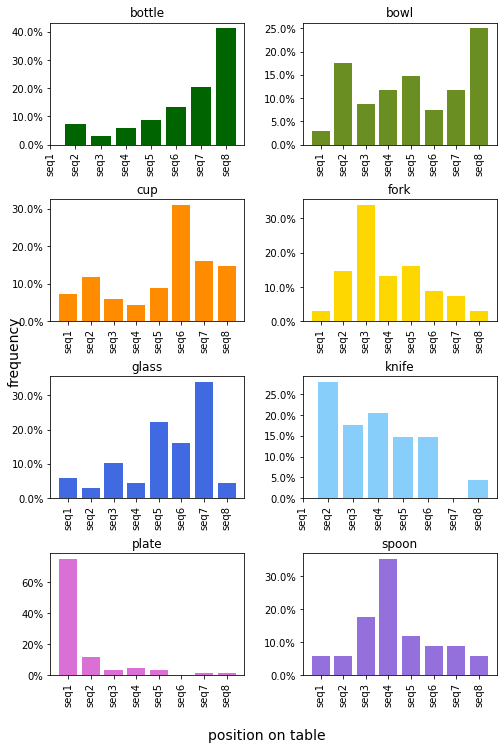

In [529]:
#%matplotlib inline
fig, axs = plt.subplots(4,2)
fig.set_size_inches(8,12)

axs[0,0].bar(np.arange(0,8,1), probs_in_seq.T['bottle'], color='darkgreen')
axs[0,1].bar(np.arange(0,8,1), probs_in_seq.T['bowl'], color='olivedrab')
axs[1,0].bar(np.arange(0,8,1), probs_in_seq.T['cup'], color='darkorange')
axs[1,1].bar(np.arange(0,8,1), probs_in_seq.T['fork'], color='gold')
axs[2,0].bar(np.arange(0,8,1), probs_in_seq.T['glass'], color='royalblue')
axs[2,1].bar(np.arange(0,8,1), probs_in_seq.T['knife'], color='lightskyblue')
axs[3,0].bar(np.arange(0,8,1), probs_in_seq.T['plate'], color='orchid')
axs[3,1].bar(np.arange(0,8,1), probs_in_seq.T['spoon'], color='mediumpurple')

axs[0,0].set_title('bottle')
axs[0,1].set_title('bowl')
axs[1,0].set_title('cup')
axs[1,1].set_title('fork')
axs[2,0].set_title('glass')
axs[2,1].set_title('knife')
axs[3,0].set_title('plate')
axs[3,1].set_title('spoon')
    
for ax in axs.flat:
    #ax.label_outer()
    #ax.set_yticks(np.arange(0,25,5))
    ax.set_xticks(range(8))
    ax.set_xticklabels(columns_seq, rotation=90)
    ax.yaxis.set_major_formatter(PercentFormatter(100))

fig.text(0.05, 0.5, 'frequency', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.05, 'position on table', ha='center', fontsize=14)

plt.subplots_adjust(wspace=0.3, hspace=0.45)

plt.show()